## Project 3-6-1 Credit Card Fraud
Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

https://www.kaggle.com/mlg-ulb/creditcardfraud

questions:  
    - is there a good way to tell if your model is over fitting when your class imbalance is so ridiculous?

Methods for coping with class weight imbalance: 
https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd
    
Oversampling
- Random oversampling: replicate existing instances of the minority class (suceptible to overfitting)
- cluster-based oversampling: identify clusters in the dataset and oversample the spaces so that classes are more equal (suceptible to overfitting)
- synthetic oversampling: create distributions for variables classified in the small class and generate synthetic examples (adds new info to the dataset and increases overall number of observations) 
- modified sythetic oversampling


Under sampling  
- random undersampling: existing instances of majority class are randomply eliminated (tricky because it may eliminate important information)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_all = pd.read_csv('creditcard.csv', nrows = 10000000)#skiprows = lambda x: x in skp_lines)
df_load = df_all.sample(frac=0.05, replace=False)

In [82]:
df_load.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,...,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000,11392.000000
mean,94604.982883,0.046156,-0.013622,0.017557,-0.008661,-0.020470,0.013045,0.013986,0.005013,0.010911,...,0.000452,-0.003392,-0.001281,0.002501,-0.009424,0.000371,-0.000830,0.000760,91.589324,0.001492
std,47644.194616,1.882610,1.645578,1.499833,1.404133,1.351413,1.324471,1.178883,1.117858,1.100451,...,0.690103,0.731075,0.767210,0.604505,0.531346,0.489221,0.380151,0.280330,286.777873,0.038603
min,10.000000,-41.928738,-42.172688,-22.588759,-4.964819,-28.815577,-20.367836,-23.386192,-33.785407,-7.383705,...,-16.640785,-7.331078,-36.666000,-2.822384,-8.696627,-1.778061,-6.900342,-4.073779,0.000000,0.000000
25%,53420.500000,-0.892369,-0.610226,-0.874910,-0.846800,-0.708912,-0.753147,-0.540571,-0.203858,-0.639860,...,-0.227612,-0.549740,-0.161607,-0.350345,-0.322141,-0.331253,-0.072079,-0.053772,5.990000,0.000000
50%,84596.000000,0.045670,0.046648,0.202952,-0.029225,-0.071896,-0.269299,0.042363,0.021646,-0.037074,...,-0.030362,0.005614,-0.007518,0.046278,0.008686,-0.050079,0.000789,0.010993,22.500000,0.000000
75%,139534.250000,1.330596,0.783307,1.030376,0.727646,0.597113,0.409828,0.572886,0.327678,0.611141,...,0.184596,0.534703,0.150208,0.442530,0.347499,0.248316,0.087936,0.078484,77.237500,0.000000
max,172745.000000,2.409347,10.594304,3.934998,12.155016,29.162172,21.190194,26.249717,11.161144,8.918202,...,19.283602,5.707723,17.751731,3.542410,5.852484,2.952840,8.932639,9.876371,12910.930000,1.000000


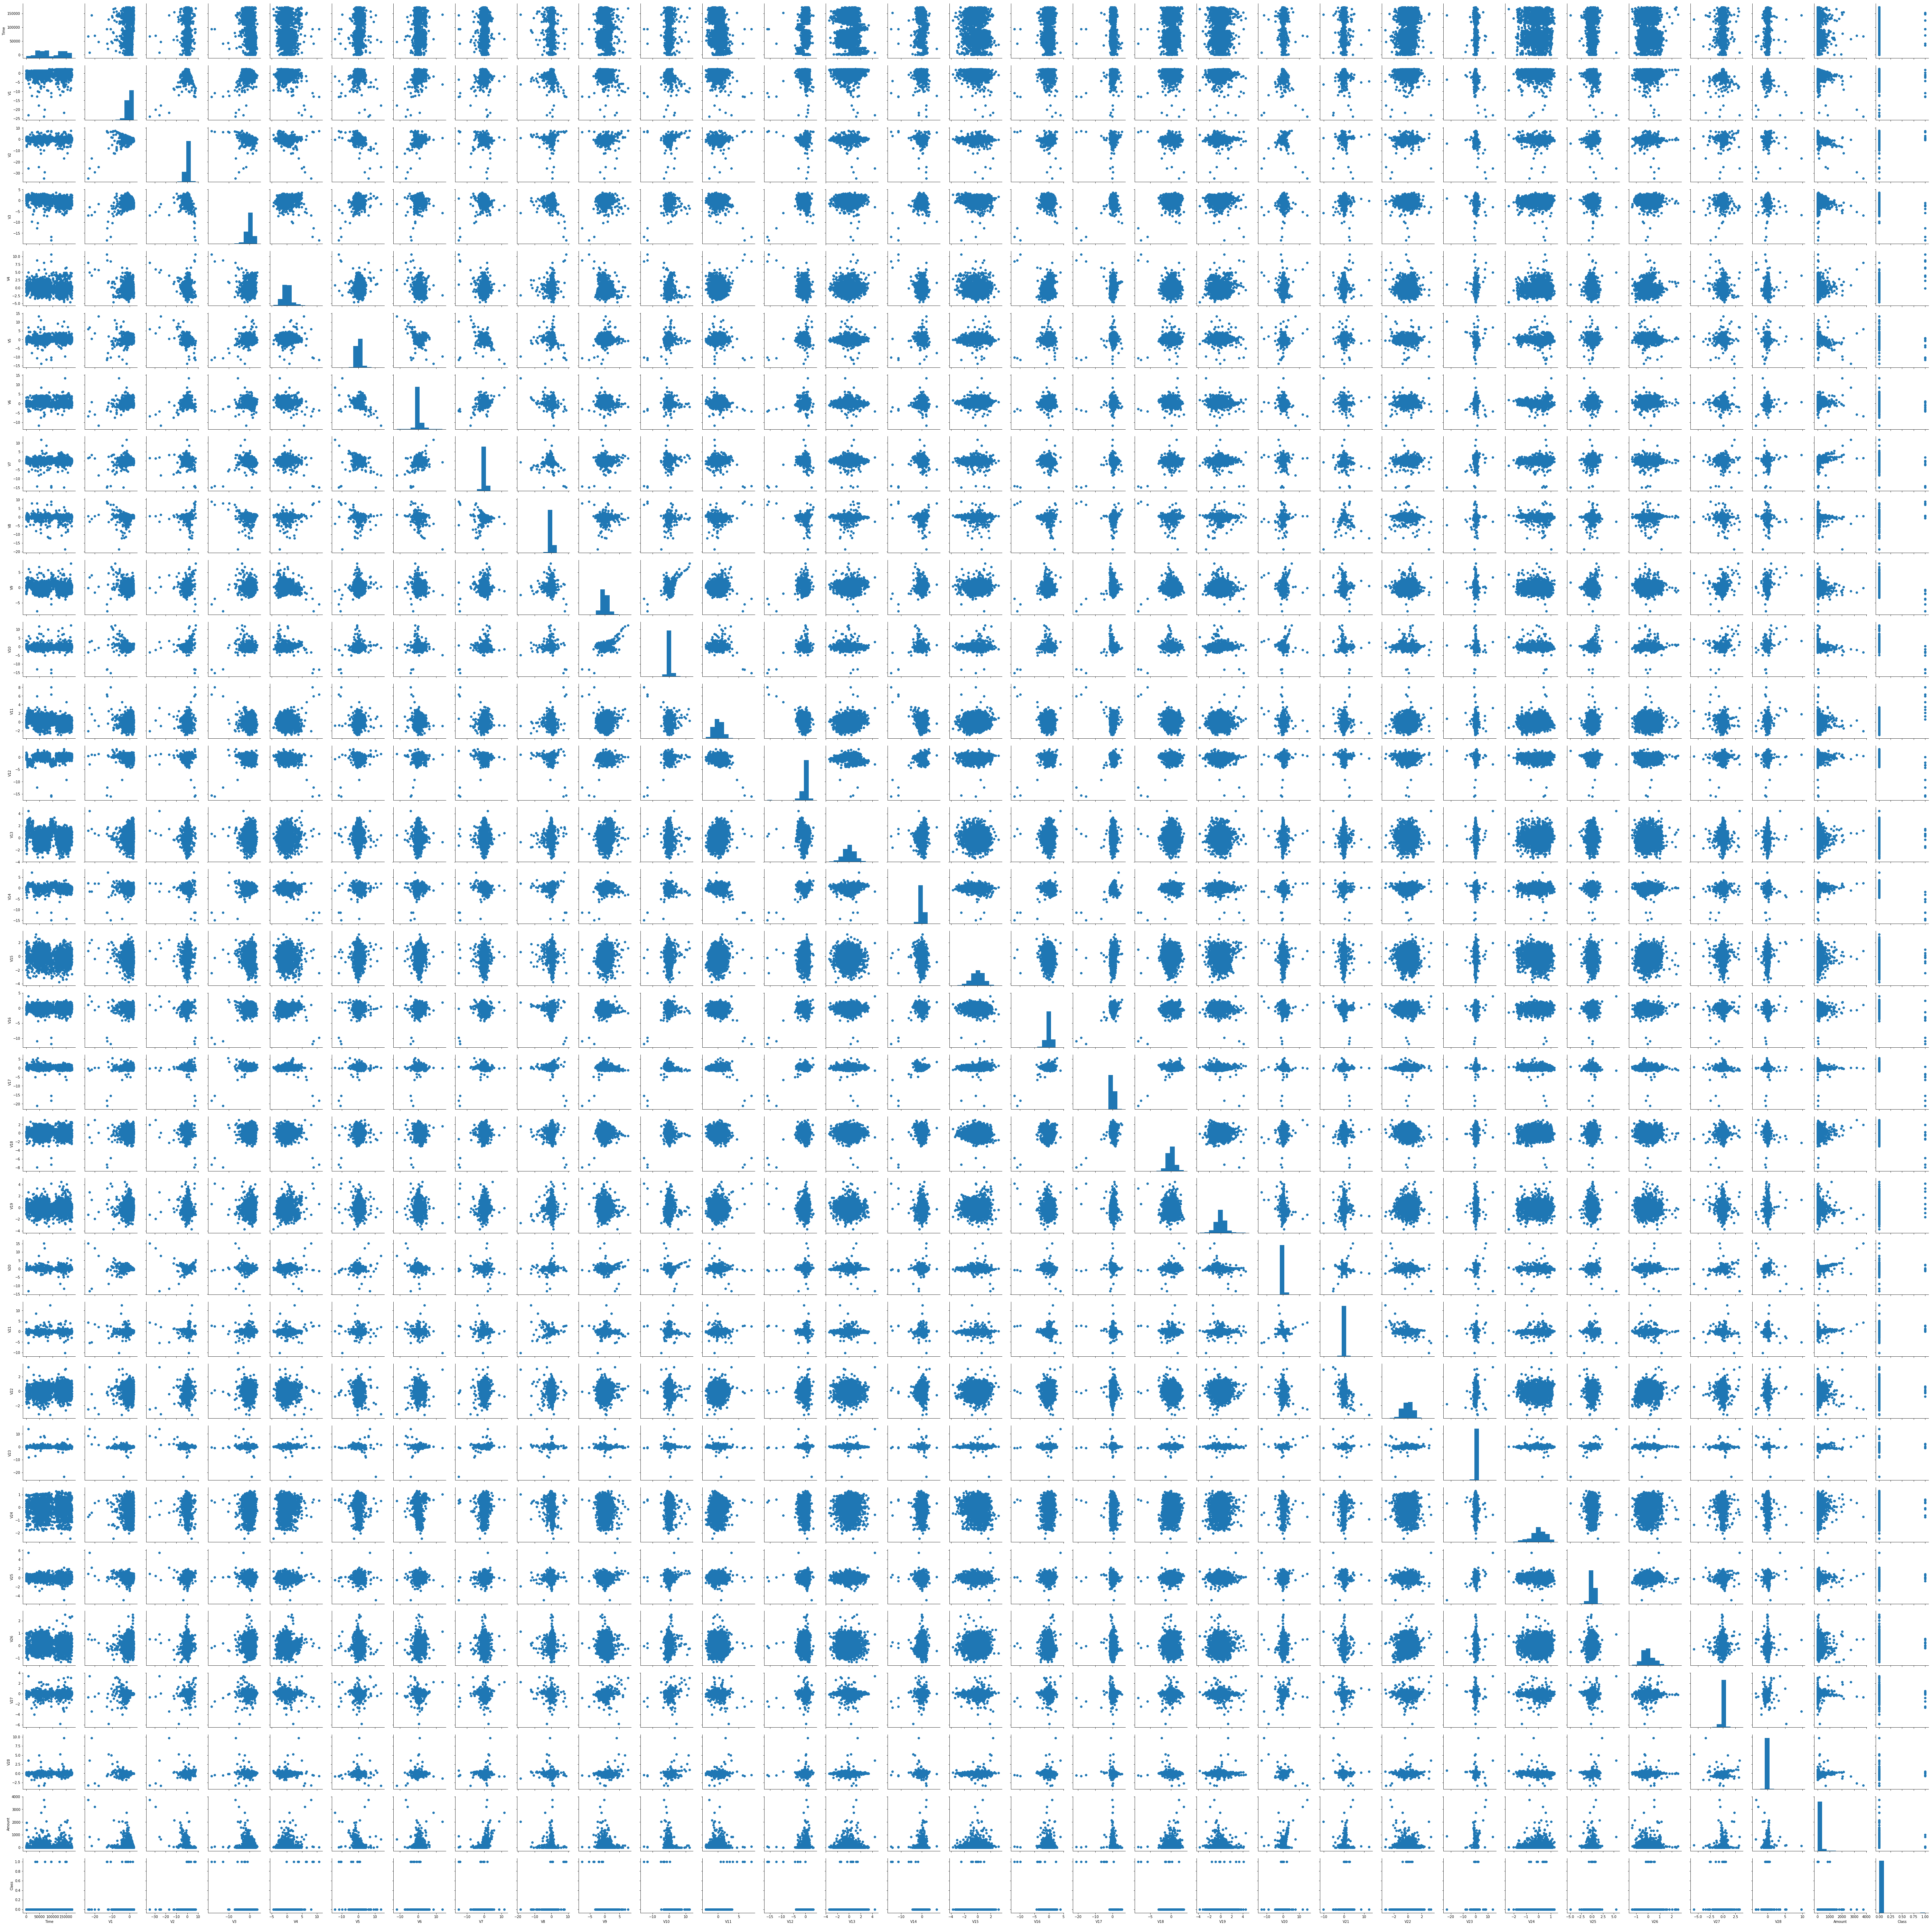

In [46]:
g = sns.PairGrid(df_load)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [3]:
X = df_load.loc[:, ~df_load.columns.isin(['Class', 'Time'])]
y = df_load['Class']

In [4]:
X_test, X_train, y_test, y_train = train_test_split(X, y)

In [5]:
sum(y_train)

9

In [6]:
print('if pick all 0:', 1-sum(y_test)/len(y_test))

if pick all 0: 0.9985955056179775


In [7]:
# Initialize and fit the model.
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_score = log_reg.score(X_test, y_test)
print('log reg score:', log_reg_score)

predict_train = log_reg.predict(X_train)
predict_test = log_reg.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


log reg score: 0.999063670412
Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.0006554307116104869
Percent Type II errors: 0.0002808988764044944


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


For this problem it's important to keep the False Negative errors (type 1) to a minimum.  Better to flag something as fraudulant and be wrong than miss something.

In [8]:
(1-sum(y_test)/len(y_test))-log_reg_score

-0.00046816479400757505

In [9]:
# Matthew Correlation Coefficient Score
FP = table_test.loc[1.0,0.0]
FN = table_test.loc[0.0,1.0]
TN = table_test.loc[0.0,0.0]
TP = table_test.loc[1.0,1.0]

(TP*TN-FP*FN)/((TP+FP)*(FN+TN)*(TP+FN)*(FP+TN))**(1/2)

0.71036869620034948

## Applying the synthetic oversampling technique
(implicitly uses knn with 6 nearest neighbors to generate new minority data points)

In [24]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote_algo = SMOTE(random_state = 0)
smote_data_X, smote_data_Y = smote_algo.fit_sample(np.asarray(X_train), np.asarray(y_train))

In [30]:
smote_data_X = pd.DataFrame(data=smote_data_X, columns = X_train.columns)
# smote_data_Y = pd.DataFrame(data=smote_data_Y)

In [31]:
# Initialize and fit the model.
log_reg = linear_model.LogisticRegression()
log_reg.fit(smote_data_X, smote_data_Y)

log_reg_score = log_reg.score(X_test, y_test)
print('log reg score:', log_reg_score)

predict_train = log_reg.predict(smote_data_X)
predict_test = log_reg.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(smote_data_Y, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


log reg score: 0.999063670412
Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.0006554307116104869
Percent Type II errors: 0.0002808988764044944


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
